In [6]:
import datetime
from matplotlib import pyplot as plt
from redvox.api1000.wrapped_redvox_packet.wrapped_packet import WrappedRedvoxPacketM
from redvox.common.data_window import DataWindow, DataWindowConfig
import pandas as pd
from scipy.io.wavfile import write
import sys
import re
import shutil
import os
import csv
import datetime
import numpy as np
from research.dataImporting import dataTools


In [6]:




path__=r"C:\Users\rclendening\researchData\researchCSVs_Scripts_etc\flightDirectoryCSV.csv"
def readDirectoryCSV(path):
    file = open(path)
    csvreader = csv.reader(file)
    rows = []
    startTimes = []
    endTimes = []
    fileNames = []
    runNames = []
    for row in csvreader:
        rows.append(row)

    for entry in rows:
        run = entry[2]
        scene = entry[1]
        passNum = entry[0]
        start = entry[3].split('_')
        end = entry[5].split('_')
        date = start[0][6:8]
        startTime = start[1]
        endTime = end[1]
        fileName = entry[7]
        startTimes.append(startTime)
        endTimes.append(endTime)
        fileNames.append(fileName)
        runNames.append((scene + 'R' + run + 'P' + passNum).strip())
    return [runNames, startTimes, endTimes, fileNames]


def getDroneGPSData(fileName, start, end):
    file = open(
        "C:\\Users\\rclendening\\researchData\\ESCAPE II_AFRL_SSD\\UAS Campaign\\UAS_log_files\\A3\\" + fileName + ".csv")
    csvreader = csv.reader(file)
    rows = []
    GPSLat = []
    GPSLon = []
    timeStamps = []
    for row in csvreader:
        rows.append(row)

    for entry in rows[3:]:  # time is column 7, long is column 4, lat is column 5

        time = entry[7]
        time = int(time) - 40000
        if int(start) <= time < int(end):
            GPSLon.append(float(entry[4]))
            GPSLat.append(float(entry[5]))
            timeStamps.append(time)
    return {"lat": GPSLat, "long": GPSLon, "time": timeStamps}


flightDetails = readDirectoryCSV()
x = 0
GPSCords = {}
for x in range(len(flightDetails[0])):
    GPSCords[flightDetails[0][x]] = (
        getDroneGPSData(fileName=flightDetails[3][x], start=flightDetails[1][x], end=flightDetails[2][x]))

TypeError: readDirectoryCSV() missing 1 required positional argument: 'path'

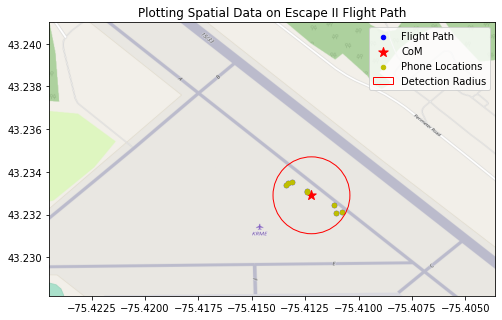

In [3]:
import datetime
from matplotlib import pyplot as plt
from redvox.api1000.wrapped_redvox_packet.wrapped_packet import WrappedRedvoxPacketM
from redvox.common.data_window import DataWindow, DataWindowConfig
import pandas as pd
from scipy.io.wavfile import write
import sys
import re
import shutil
import os
import csv
import datetime
import numpy as np
from research.dataImporting import dataTools

def convertToGPS(path,name):
    window = dataTools.import_redVoxData(path)
    station = window.first_station()

    locationSensor = station.best_location_sensor()
    if locationSensor:
        lat=locationSensor._data.columns[3]
        lon=locationSensor._data.columns[4]
        alt=locationSensor._data.columns[5]
        phoneGPS.append([name,np.mean(lat),np.mean(lon),np.mean(alt)])


def searchDir(rootdir):
    it = 0
    for it in os.scandir(rootdir):
        if it.is_dir():
            # print(it.path)
            searchDir(it)
        else:
            it = os.path.dirname(it)
            break
    if isinstance(it, str):
        splitPath = it.split('\\')
        convertToGPS(it,splitPath[8])
phoneGPS=[]
searchDir(r"C:\Users\rclendening\researchData\Unused_Datasets\EscapeCell_Data\A2\A2R2P1")
GPS_df=pd.DataFrame(phoneGPS, columns=['Name','Lat','Lon','Alt'])
GPS_df.to_csv('./all_phone_gps_SF.csv')
print()

KeyboardInterrupt: 

In [6]:
lat=np.transpose(phoneGPS)[1]
lon=np.transpose(phoneGPS)[2]
lon=lon.astype(float)
lat=lat.astype(float)
lat=np.delete(lat,np.argwhere(lat <=43.00))
lon=np.delete(lon,np.argwhere(lon <=-76.00))
lat=np.delete(lat,np.argwhere(lat >44.00))
lon=np.delete(lon,np.argwhere(lon >-75.00))
centerLon=np.mean(lon)
centerLat=np.mean(lat)
print(centerLon,centerLat)
# centerLon=np.mean(np.array(phonesLon))
# centerLat=np.mean(np.array(phonesLat))
# print(centerLon,centerLat)

-75.41211443721906 43.232733800618774


NameError: name 'phonesLon' is not defined

In [8]:
timeStampsInRange=[]
i=0
time_truth=[]
for y in GPSCords:
    timeStampsInRange=[]
    for x in range(len(GPSCords[y]['lat'])):
        if (np.square(GPSCords[y]['lat'][x]-centerLat)+ np.square(GPSCords[y]['long'][x]-centerLon)) <np.square(.0025): # if distance from center is less than <166.6 meters from center of mass, changed of .0018
            timeStampsInRange.append(GPSCords[y]['time'][x])

    testLength=(int(flightDetails[2][i])-int(flightDetails[1][i]))-40
    startInFrame = min(timeStampsInRange)-int(flightDetails[1][i])
    stopInFrame =  max(timeStampsInRange)-int(flightDetails[1][i])
    if startInFrame >=100:
        startInFrame=startInFrame-40
    if stopInFrame >=100:
        stopInFrame=stopInFrame-40
    time_truth.append([y,startInFrame,stopInFrame])
    i+=1
inframe_df=pd.DataFrame(time_truth, columns=['Scenario','start','stop'])
inframe_df.to_csv('./drone_test_truth_data_8phones_within_277.csv')

In [21]:
BBox = [-75.4300, -75.4036, 43.2257, 43.2435]
mymap = plt.imread(r"C:\Users\rclendening\Downloads\map2.png")
phonesLat=[43.23312641,43.23347188, 43.23338126,43.23353135,
43.2330566,43.23247352,43.23210987, 43.23209401]
phonesLon=[-75.41241324,-75.41329405,-75.41342394,
-75.41312926,
-75.41241213, -75.41116061,-75.41076941,-75.41107134]
# phonesLat=[43.23349806,
# 43.23312641,
# 43.23247066,
# 43.23348702,
# 43.23297853,
# 43.23304088,
# 43.23347188,
# 42.3021124,
# 43.23353135,
# 43.23194155,
# 43.23338126,
# 42.3021137,
# 42.3021175,
# 43.23198674,
# 43.23190607,
# 43.23203387,
# 43.23235047,
# 43.23197486,
# 43.23288015,
# 42.3021486,
# 43.2330566,
# 43.23247352,
# 43.23286872,
# 43.23210987,
# 43.23346439,
# 43.23209401
# ]
# phonesLon=[
#     -75.41324084,
# -75.41241324,
# -75.41118286,
# -75.41320775,
# -75.41251675,
# -75.41254552,
# -75.41329405,
# -83.688876,
# -75.41312926,
# -75.41134823,
# -75.41342394,
# -83.6889583,
# -83.688703,
# -75.41124812,
# -75.41133039,
# -75.41118023,
# -75.41112105,
# -75.41122413,
# -75.41266274,
# -83.6886172,
# -75.41241213,
# -75.41116061,
# -75.4126908,
# -75.41076941,
# -75.41333381,
# -75.41107134,
# ]

fig, ax = plt.subplots(figsize=(8, 7))
ax.scatter(x=np.asarray(phonesLon), y=np.asarray(phonesLat), zorder=1, alpha=1, c='b',
           s=20, label="Flight Path")
ax.scatter(x=centerLon, y=centerLat,marker="*", zorder=1, alpha=1, c='r',
           s=100, label="CoM")

ax.scatter(x=phonesLon, y=phonesLat, zorder=1, alpha=1, c='y',
           s=20, label="Phone Locations")
circle1 = plt.Circle(xy=(centerLon, centerLat), radius=0.0018, color='red', fill=False, label="Detection Radius")
ax.add_patch(circle1)
ax.set_title('Plotting Spatial Data on Escape II Flight Path')
ax.set_xlim(BBox[0]+.0055, BBox[1])
ax.set_ylim(BBox[2]+.0025, BBox[3]-.0025)
plt.legend()
ax.imshow(mymap, zorder=0, extent=BBox, aspect='equal')
plt.savefig("lfScenario.pdf",dpi=1200)

Storing distance of each cell phone from drone in CSV

In [7]:
import datetime
from matplotlib import pyplot as plt
from redvox.api1000.wrapped_redvox_packet.wrapped_packet import WrappedRedvoxPacketM
from redvox.common.data_window import DataWindow, DataWindowConfig
import pandas as pd
from scipy.io.wavfile import write
import sys
import re
import shutil
import os
import csv
import datetime
import numpy as np
from research.dataImporting import dataTools
import librosa
from librosa.feature import mfcc

def convertToGPS(path,name):
    window = dataTools.import_redVoxData(path)
    station = window.first_station()

    locationSensor = station.best_location_sensor()
    if locationSensor:
        lat=locationSensor._data.columns[3]
        lon=locationSensor._data.columns[4]
        alt=locationSensor._data.columns[5]
        phoneGPS.append([name,np.mean(lat),np.mean(lon),np.mean(alt)])


def searchDir(rootdir):
    it = 0
    for it in os.scandir(rootdir):
        if it.is_dir():
            # print(it.path)
            searchDir(it)
        else:
            it = os.path.dirname(it)
            break
    if isinstance(it, str):
        splitPath = it.split('\\')
        convertToGPS(it,splitPath[8])

def get_filepaths(data_path):
    files=[]
    for path, subdirs, files in os.walk(data_path):
        for name in files:
            files.append(os.path.join(path, name))
    return files

# def split_audio(waveData, sampleFreq):
#     '''
#     Frames audio data and converts to feature space (MFCC)
#     :param waveData: waveData array of time-domain audio
#     :param sampleFreq: Sample Frequency (8Khz)
#     @return list of features (ds), list of labels corresponding to feature dataset:
#     '''
#     # middle third of data
#     duration = waveData.shape[0]
#     startTime = np.round(duration / 3)
#     endTime = np.round(duration * 2 / 3)
#     waveDataSplit= waveData[int(startTime):int(endTime)]
#     features=MFCCCalc(waveDataSplit.squeeze(), sampleFreq)
#     #label= [droneDict[labelName]] * features.shape[1]
#     return features

def create_dataset(train_files):
    '''
    Creates feature dataset and label dataset.
    @param train_files: EagerTensor of file paths.
    @return list of features (ds), list of labels corresponding to feature dataset:
    '''
    features = []
    for x in train_files:
        #test_file = tf.io.read_file(x)
        #test_audio, sampleRate = tf.audio.decode_wav(contents=test_file)
        test_audio, sampleRate = librosa.load(x, sr=8000)
        if min(np.asarray(test_audio)) != 0 and len(test_audio)!=0:
            x = str(x)
            #newData = test_audio[0: test_audio.shape[0] - test_audio.shape[0] % sampleRate]  # trim to nearest second
            #newFeats, newLabs = split_audio(test_audio, int(sampleRate))
            phone_features=MFCCCalc(test_audio.squeeze(),Fs=8000)
            features.extend(phone_features.transpose())
        else:
            features.extend(np.zeros(len(features[0]))) #just trying to fill space

    return features

def MFCCCalc(audioData, Fs):
    '''
    Converts decoded wav file to MFCC feature space
    @param audioData: Numpy array of decoded audio wav file
    @return MFCC coefficients
    '''
    data= audioData.astype(float)
    coefs = mfcc(y=data, hop_length=2048,n_mfcc=40, sr=Fs)
    return coefs
import math

passes_df=pd.read_csv(r"C:\Users\rclendening\researchData\researchCSVs_Scripts_etc\A1_A2_flight_directory.csv")
print()
to_meters=111139
range_df=pd.DataFrame(columns=["Name","Lat","Lon","Alt","Range"])
#test123=readDirectoryCSV(r"C:\Users\rclendening\researchData\researchCSVs_Scripts_etc\A1_A2_flight_directory.csv")
def distanceCalc(phoneLat,phoneLon,phoneAlt, droneLat,droneLon,droneAlt):
    lat_delta= (phoneLat-droneLat)*to_meters
    lon_delta=(phoneLon-droneLon)*to_meters
    return np.sqrt((lat_delta**2+lon_delta**2+(phoneAlt-droneAlt)**2))
for x in passes_df.iterrows():
    phoneGPS=[]
    row=x[1]
    pass_num=row[0]
    scenario=row[1]
    run_num=row[2]
    start=row[3]
    stop=row[4]
    drone_gps_file=row[5]
    full_name=(str(scenario) + 'R' + str(run_num) + 'P' + str(pass_num)).strip()

    searchDir(("C:\\Users\\rclendening\\researchData\\Unused_Datasets\\EscapeCell_Data\\"+scenario+"\\"+full_name))
    GPS_df=pd.DataFrame(phoneGPS, columns=['Name','Lat','Lon','Alt'])
    start_time=datetime.datetime(2021, 8, int(start[6:8]), int(start[9:11]), int(start[11:13]),int(start[13:15])).timestamp()
    stop_time=datetime.datetime(2021, 8, int(stop[6:8]), int(stop[9:11]), int(stop[11:13]),int(stop[13:15])).timestamp()
    if drone_gps_file[0]== 'F':
        FLY=True
    else:
        FLY=False
    GPS_flight_log=pd.read_csv(("C:\\Users\\rclendening\\researchData\\ESCAPE II_AFRL_SSD\\UAS Campaign\\UAS_log_files\\A1_A2"+"\\"+drone_gps_file+".csv"))
    if FLY==True:
        lon=GPS_flight_log.iloc[:,5]
        lat=GPS_flight_log.iloc[:,6]
        time=GPS_flight_log.iloc[:,7]
        date=GPS_flight_log.iloc[:,8]
        height=GPS_flight_log.iloc[:,10]
    else:
        lon=GPS_flight_log.iloc[:,3]/10**7
        lat=GPS_flight_log.iloc[:,2]/10**7
        time_UTC=GPS_flight_log.iloc[:,1]/10**6
        height=GPS_flight_log.iloc[:,5]/10**3
    #for phones in GPS_df: #FLY files Long=col(5) lat=col(6) date=col(7) time=col(8) height (MSL)=col(10)
                        #Non-FLY files lat=col(3) lon=col(4) timestamp(UTC)=col(1) height (MSL)= col(5) in millimeters
    usable_phones=[]
    for ph in phoneGPS:
        if 43.00 < ph[1] < 44.00 and -75.00 > ph[2] > -76.00:
            usable_phones.append(ph)

    for t in range(0,len(GPS_flight_log)):
        if FLY:
            if np.isnan(time[t]):
                cur_time=0
            else:
                cur_time=datetime.datetime(2021, 8, int(start[6:8]), int(str(time[t])[0:2]),int(str(time[t])[2:4]),int(str(time[t])[4:6])).timestamp()
        else:
            cur_time=time_UTC[t]


        time_delta=cur_time-start_time
        filepaths= get_filepaths("C:\\Users\\rclendening\\researchData\\EscapeCell_DataWav\\"+scenario+"\\"+full_name)
        phone_features= create_dataset(filepaths)



        if  start_time < cur_time<= stop_time:
            for phone in usable_phones:
                    val=distanceCalc(phone[1],phone[2],phone[3], lat[t],lon[t],height[t])
                    range_df.loc[len(range_df.index)]=[str(phone[0]),np.float64(phone[1]),np.float64(phone[2]),np.float64(phone[3]),np.float64(val)]
        ##TODONEXT: create method to store audio data with attached range
print()

NameError: name 'searchDir' is not defined